In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/naukri.csv')

In [ ]:
df.head()

In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [ ]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [5]:
# multiple city related row gulo comma dara seperate kora hoise next e data cleaning korar jonno
df['joblocation_address'] = df['joblocation_address'].str.split(',')
df['joblocation_address'].iloc[:5]

0                                            [Chennai]
1                                            [Chennai]
2                                          [Bengaluru]
3    [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                          [Bengaluru]
Name: joblocation_address, dtype: object

In [6]:
df = df.explode('joblocation_address') # explode function same row er multiple value gulo k alada alada row e convert kore, jodio tader index same thake
pd.set_option('max_rows', 3000)
df['joblocation_address'].value_counts()[:20] # explode func use korar karone kon city exaclty koibar ache ta count func diye ber kora geche.

Bengaluru/Bangalore           3775
Mumbai                        2593
Bengaluru/Bangalore           2134
Bengaluru                     2026
 Mumbai                       1378
Chennai                       1290
Hyderabad / Secunderabad      1246
Hyderabad                     1154
Mumbai                        1067
 Mumbai                        923
 Chennai                       905
Delhi                          790
Noida                          777
Gurgaon                        762
 Chennai                       738
 Hyderabad / Secunderabad      700
Delhi                          680
 Pune                          645
 Delhi                         602
 Gurgaon                       557
Name: joblocation_address, dtype: int64

In [7]:
df['joblocation_address'].isnull().sum()

501

In [8]:
df['experience'].isnull().sum()


4

In [9]:
df['joblocation_address'].nunique()


758

In [10]:
df['joblocation_address'] = df['joblocation_address'].fillna(df['joblocation_address'].mode()[0])

In [11]:
df['joblocation_address'].isnull().sum()


0

In [ ]:
for i in df.joblocation_address:
  if type(i) == 'float':
    print(i)

In [12]:
for i in df.joblocation_address:
  if 'Bengaluru' in i:
        df['joblocation_address'] = df['joblocation_address'].replace(i, 'Bengalore')
  elif 'Bengalore' in i:
        df['joblocation_address'] = df['joblocation_address'].replace(i, 'Bengalore')




In [13]:
df['joblocation_address'].nunique()

748

In [ ]:
df['joblocation_address'].unique()


In [14]:
for j in df.joblocation_address:
  if 'Mumbai' in j:
        df['joblocation_address'] = df['joblocation_address'].replace(j, 'Mumbai')
  elif 'mumbai' in j:
        df['joblocation_address'] = df['joblocation_address'].replace(j, 'Mumbai')
  elif 'Bangalore' in j:
        df['joblocation_address'] = df['joblocation_address'].replace(j, 'Bengalore')
  elif 'Delhi' in j:
        df['joblocation_address'] = df['joblocation_address'].replace(j, 'Delhi')
  elif 'hyderabad' in j:
        df['joblocation_address'] = df['joblocation_address'].replace(j, 'Hyderabad')
  elif 'Hyderabad' in j:
        df['joblocation_address'] = df['joblocation_address'].replace(j, 'Hyderabad')





In [15]:
df['joblocation_address'].nunique()


656

In [16]:
df['joblocation_address'].value_counts()


Bengalore                                        10405
Mumbai                                            6402
Hyderabad                                         4590
Delhi                                             4287
Chennai                                           1290
 Chennai                                           905
Noida                                              777
Gurgaon                                            762
 Chennai                                           738
 Pune                                              645
 Gurgaon                                           557
Noida                                              490
 Pune                                              486
Chennai                                            436
 Noida/Greater Noida                               345
Gurgaon                                            336
 Kolkata                                           287
 Gurgaon                                           254
 Noida    

In [17]:
for k in df.joblocation_address:
  if 'Chennai' in k:
        df['joblocation_address'] = df['joblocation_address'].replace(k, 'Chennai')
  elif 'Ahmedabad' in k:
        df['joblocation_address'] = df['joblocation_address'].replace(k, 'Ahmedabad')
  elif 'Kolkata' in k:
        df['joblocation_address'] = df['joblocation_address'].replace(k, 'Kolkata')

In [18]:
df['joblocation_address'].nunique()


639

In [ ]:
df['joblocation_address'].value_counts()


In [19]:
for l in df.joblocation_address:
  if 'Pune' in l:
        df['joblocation_address'] = df['joblocation_address'].replace(l, 'Pune')
  elif 'Noida' in l:
        df['joblocation_address'] = df['joblocation_address'].replace(l, 'Noida')
  elif 'Gurgaon' in l:
        df['joblocation_address'] = df['joblocation_address'].replace(l, 'Gurgaon')

In [20]:
df['joblocation_address'].nunique()


614

In [ ]:
df['joblocation_address'].value_counts()


In [21]:
# 1st e counts var er moddhe all typer value store korse
counts = df['joblocation_address'].value_counts()
# df er je index gular city less than 25 oi index er jonno isin func true otherwise false return korbe, then oi true value er location new df e store hoise
df = df.loc[df['joblocation_address'].isin(counts.index[counts > 25])]
display(df['joblocation_address'].value_counts())


Bengalore                      10405
Mumbai                          6402
Hyderabad                       4590
Delhi                           4287
Chennai                         3375
Noida                           2110
Gurgaon                         1914
Pune                            1229
Kolkata                          545
Ahmedabad                        404
Ghaziabad                        102
 Chandigarh                       94
 Surat                            90
 Ernakulam / Kochi/ Cochin        74
 Coimbatore                       70
 Chandigarh                       69
 Jaipur                           64
 karnataka                        63
 Coimbatore                       60
 Vijayawada                       51
 Lucknow                          49
 Indore                           48
 Jaipur                           48
 Faridabad                        47
 Lucknow                          47
 maharashtra                      46
 Ghaziabad                        46
 

In [22]:
df['joblocation_address'].nunique()

43

In [23]:
df['experience'][:5]

0      0 - 1 yrs
1      0 - 0 yrs
2      4 - 8 yrs
3    11 - 15 yrs
3    11 - 15 yrs
Name: experience, dtype: object

In [24]:
pd.set_option('max_rows', 40000)
# split korsi bcz amra amra every splitted data alada alada var e rakhbo
df['experience'].str.split(' ')[:5]

0      [0, -, 1, yrs]
1      [0, -, 0, yrs]
2      [4, -, 8, yrs]
3    [11, -, 15, yrs]
3    [11, -, 15, yrs]
Name: experience, dtype: object

In [25]:
df.experience.isnull().sum()

4

In [27]:
df['experience'] = df['experience'].fillna(df['experience'].mode()[0])

In [28]:
df['experience'].isnull().sum()

0

In [29]:
df['experience'] = df['experience'].str.split(' ')
x = df['experience']
# splitted data er moddhe je gula minimum oigula stored
df['Min Experience'] = x.apply(lambda x: x[0]) # apply function every index er 0 number index value niye ashbe coz x[0]
# 2 number index e max value ache so apply func use kore every row er 2 num index er value anbe if every index length 2 theke boro hoy otherwise x[1] anbe
df['Max Experience'] = x.apply(lambda x: x[2] if len(x) > 2 else x[1])

In [33]:
df['Min Experience'].value_counts()

2      7340
0      6331
3      5393
1      4450
5      3353
4      3155
6      1538
10     1451
8      1308
7      1058
9       490
12      314
15      286
Not     111
11       75
13       73
14       66
20       27
18       26
16       16
17        6
23        1
25        1
26        1
Name: Min Experience, dtype: int64

In [34]:
df['Max Experience'].value_counts()


5            6472
7            4483
8            3756
6            3306
3            3228
10           2891
4            2675
9            1822
2            1604
1            1104
12           1091
11           1059
15            844
13            691
20            502
0             362
14            255
18            137
Mentioned     111
16            109
17             93
25             85
22             83
19             27
23             26
24             20
21             12
30             11
28              8
-1              1
27              1
26              1
Name: Max Experience, dtype: int64

In [35]:
df['Min Experience'] = df['Min Experience'].replace('Not', 0)
df['Max Experience'] = df['Max Experience'].replace(('Mentioned','-1'), (5,5))

In [36]:
# Lets Covert them into numerical data types
df['Min Experience'] = df['Min Experience'].astype('int')
df['Max Experience'] = df['Max Experience'].astype('int')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


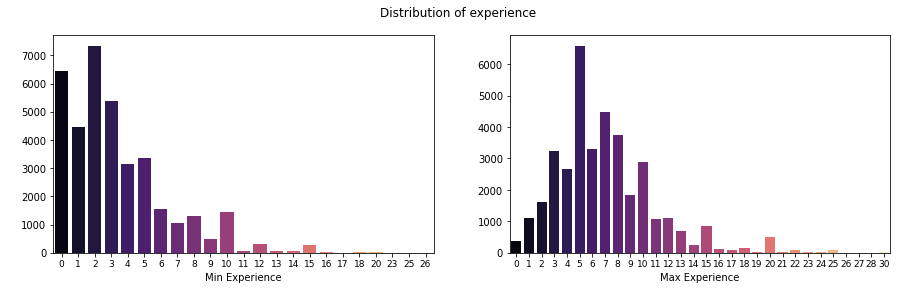

In [39]:
# Check the distribution of Min nd Max experiecne
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.countplot(df['Min Experience'], palette='magma')
plt.xticks(fontsize=9)
plt.ylabel(" ")

plt.subplot(1,2,2)
sns.countplot(df['Max Experience'], palette='magma')
plt.xticks(fontsize=9)
plt.ylabel(" ")

plt.suptitle('Distribution of experience')
plt.show()

In [40]:
df['education'][:5]

0    UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1    UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2    UG: Any Graduate - Any Specialization PG:Any P...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
Name: education, dtype: object

In [41]:
df['education'].isnull().sum()

3128

In [42]:
df['education'] = df['education'].fillna('UG: Any Graduate - Any Specialization')
df['education'].isnull().sum()

0

In [43]:
df['education'] = df['education'].str.split(' ')

In [44]:
df['education'] = df['education'].apply(lambda x: x[1] if len(x) > 1 else x[0])


In [45]:
df['education'].value_counts(dropna=False)

Any                    24171
B.Tech/B.E.             8991
B.Com                    661
B.Sc                     543
Diploma                  441
Graduation               397
B.B.A                    273
B.A                      246
BCA                      174
MBBS                     158
BDS                      109
B.Pharma                 102
Other                     86
B.Ed                      82
LLB                       70
BHM                       56
-                         54
Not                       54
Doctorate                 49
B.Arch                    38
B.Tech/B.E.,              24
B.Sc,                     23
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
Diploma,                   5
B.Com,                     5
BCA,                       3
BVSC                       3
B.A,                       3
MBA/PGDM                   2
B.B.A,                     2
PG:Other                   1
Post          

In [46]:
df['education'] = df['education'].replace(('B.Tech/B.E.', 'B.Tech/B.E.,', 'B.Sc', 'B.Sc,', 'B.Com', 'B.Com,', 'B.B.A,', '-', 'Not'), 
                                          ('B.Tech', 'B.Tech', 'B.Sc', 'B.sc', 'B.Com', 'B.Com', 'B.B.A', 'Any', 'Any'))
df['education'].value_counts()

Any                    24279
B.Tech                  9015
B.Com                    666
B.Sc                     543
Diploma                  441
Graduation               397
B.B.A                    275
B.A                      246
BCA                      174
MBBS                     158
BDS                      109
B.Pharma                 102
Other                     86
B.Ed                      82
LLB                       70
BHM                       56
Doctorate                 49
B.Arch                    38
B.sc                      23
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
Diploma,                   5
BCA,                       3
B.A,                       3
BVSC                       3
MBA/PGDM                   2
BAMS                       1
B.Des.                     1
Post                       1
PG:Other                   1
BFA                        1
Name: education, dtype: int64

In [48]:
df['industry'][:10]

0            Media / Entertainment / Internet
1    Advertising / PR / MR / Event Management
2             IT-Software / Software Services
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
4             IT-Software / Software Services
5             IT-Software / Software Services
Name: industry, dtype: object

In [49]:
df['industry'].isnull().sum()

5

In [50]:
df['industry'] = df['industry'].fillna(df['industry'].mode()[0])
df['industry'].isnull().sum()

0

In [51]:
df['Industry'] = df['industry'].str.split('/')
df['Industry'] = df['Industry'].apply(lambda x: x[0])
df['Industry'].value_counts()

IT-Software                 14803
BPO                          2305
Banking                      2095
Education                    1768
Recruitment                  1559
Automobile                   1151
Internet                     1033
Pharma                       1015
Construction                  958
Medical                       931
Travel                        734
Industrial Products           614
Accounting                    545
Other                         544
Strategy                      528
Advertising                   471
IT-Hardware & Networking      439
Telecom                       437
Media                         436
FMCG                          417
Insurance                     389
Retail                        366
Oil and Gas                   343
Real Estate                   305
Consumer Electronics          266
Semiconductors                250
Electricals                   238
Textiles                      198
Courier                       182
KPO           

In [54]:
df['skills'][:10]

0                                     ITES
1                                Marketing
2    IT Software - Application Programming
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
4    IT Software - Application Programming
5    IT Software - Application Programming
Name: skills, dtype: object

In [55]:
df['skills'] = df['skills'].str.split('-')

In [59]:
df['skills'] = df['skills'].fillna('Application Programming')

In [60]:
df['skills'].isnull().sum()

0

In [61]:
df['Skills'] = df['skills'].apply(lambda x: x[1] if len(x) > 1 else x[0]) 
df['Skills'].value_counts()

 Application Programming             9234
Sales                                5866
ITES                                 2972
Production                           1567
Accounts                             1544
HR                                   1474
Teaching                             1378
Marketing                            1354
Medical                               846
p                                     804
Financial Services                    757
Site Engineering                      666
 Other                                635
Engineering Design                    624
 ERP                                  569
 eCommerce                            531
 Network Administration               509
 QA & Testing                         480
IT Hardware                           468
Journalism                            440
 DBA                                  425
Supply Chain                          378
 Embedded                             372
Design                            

In [62]:
df.isnull().sum()

company                    4
education                  0
experience                 0
industry                   0
jobdescription             4
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions      28016
payrate                   97
postdate                  31
site_name              30959
skills                     0
uniq_id                    0
Min Experience             0
Max Experience             0
Industry                   0
Skills                     0
dtype: int64

In [ ]:
df['numberofpositions'] = df['numberofpositions'].fillna(1)
df['numberofpositions'] = df['numberofpositions'].astype('int')

df['numberofpositions'].value_counts()

In [64]:
df['numberofpositions'].isnull().sum()

0

In [65]:
# if the job post and pay rate columns have missing value that is useless, so we use dropna func to remove all the missing value

df = df.dropna()
df.isnull().sum().sum()

0